Feature Selective Networks for Object Detection

该论文的出发点是，改善roi pooling的特征处理来增强检测效果。

之前roi pooing将roi各部分特征进行简单的全通道、单独池化来得到roi的特征图，没有考虑roi上子区域间的联系和长宽比。这些roi pooling得到的特征具有平移不变性，但是平移不变性更侧重于对物体的定位，对于检测任务不敏感。通常对象在不同的子区域中有不同的特征，这些子区域用不同的特征来表示。　

本文提出利用roi子区域间的联系和宽高比来改进从roi pooling得到的特征。

使用本文中的网络结构，为整张图片生成了子区域注意力库（attention bank）和宽高比注意力库，基于roi的子区域注意力库和宽高比注意力库，有选择地从库中选择，然后汇聚起来用于最后的分类。

![Selection_053.png](attachment:Selection_053.png)
图片１，对于每一个RoI，生成一个子区域注意力图(attention map)和宽高比注意力图。在不同RoI中的对于相同位置，子区域注意力图给予不同的特征注意(feature attentions)。
对于不同的RoIs,宽高比注意力图也生成有明显区别的特征注意。

![image.png](attachment:image.png)
图片2,显示，rfcn模型能较好地保持物体的局部特征，但难以保持物体的全局特征。而本文提出的网络结构则可以通过生成子区域主语图来扩展子区域信息，
从而能较好的保持物体的全局特征。

![Selection_055.png](attachment:Selection_055.png)
图片３，分区域注意力生成(Region-wise attention Generation),根据RoI子区域划分和长宽比，分别生成子区域注意力图和长宽比注意力图。
只要给定RoI,网络就会有选择地将子区域注意力图和长宽比注意力图进行池化，并然后将两种注意力图进行对应加和起来。通过将注意图映射与压缩后的RoI特征合并，生成最终的roi特征。

![Selection_056.png](attachment:Selection_056.png)
sub-region attention bank

现在大多数的检测方法中，对于子区域的特征提取，使用roi pooling对roi个各个区域分别进行位置无关的pooling,然后得到特征。为了使子区域间有依赖关系，使用shifted convoluation来对整张图的feature map生成子区域注意力库。具体到每一个roi,假定在整个特征图中的位置F(i,j)为在某一roi中第k个位置。对当前点F(i,j)使用shifted convoluation来进行特征注意力的提取，一个特征注意力的大小为Cs个通道的向量。Wsr是对当前点F(i,j)进行一系列的特征注意力提取，总共有NsrCs维。

shifited convolution是一种特殊的deformable convoluatoin。因为shifited convolution是在２维方向上，朝着具体的某一个方向进行偏移。

![Selection_057.png](attachment:Selection_057.png)
Aspect Ratio Attention Bank

在实际中，不同类别的对象，通常有不同的长宽比；同一对象，不同角度、姿态的长宽比也不同。现有的物体检测的roi pooling方法都是生成统一大小的特征表示（通常为７×７），这样就忽略了不同的长宽比。
在本文的方法中，利用长宽比注意力库来利用不同的宽高比信息。使用１×１的卷积层来得到每一个位置上的长宽比感知分量。将不同的长宽比分成３类。War类似于Wsr，是当前位置F(i,j)上提取的一系列特征注意力。

Attention Maps

使用selective roi pooling对得到的区域注意库和宽高比注意库进行映射。
![Selection_058.png](attachment:Selection_058.png)

公式中Msr(m,n,c)和Mar(m,n,c)表示第ｃ个通道上，第(m,n)个池化块，分别对应子区域注意力图和长宽比注意力图。上述公式就是对每个子区域的各个通道上分别进行max-pool得到的结果。

seletcive roi pooling产生h×w×Cs大小的结果，所以对于两个注意力图，产生维数相同的的特征表示，然后逐元素相加。再对被压缩了的roi特征进行加权，得到最后的roi特征。

检测的时候，还将将全连接层的参数减少。

以下为具体的实验结果：

![Selection_059.png](attachment:Selection_059.png)

![Selection_060.png](attachment:Selection_060.png)


[p6]: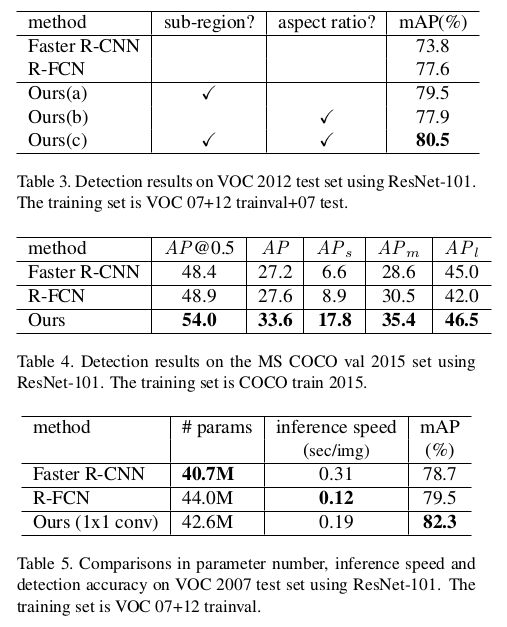

关于roi pooling的描述https://blog.csdn.net/zj360202/article/details/78845601